# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## Aggregated Features (RFMS) 

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [3]:
aggregated_df = create_aggregate_features(cleaned_df)
aggregated_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500.0,500,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,81
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,5
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,...,10000.0,10000,2018-11-15 03:44:31+00:00,4,0,93400.00,3220.689655,29,5493.966126,5
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,...,500.0,500,2018-11-15 04:14:59+00:00,2,0,8060.00,2015.000000,4,3342.588817,88


## Time Features

In [4]:
time_df = extract_time_features(aggregated_df)
time_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,0,109921.75,923.712185,119,3042.294251,0,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0,1000.00,500.000000,2,0.000000,81,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,0,228727.20,6019.136842,38,17169.241610,5,3,15,11,2018
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,...,0,93400.00,3220.689655,29,5493.966126,5,3,15,11,2018
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,...,0,8060.00,2015.000000,4,3342.588817,88,4,15,11,2018


## RFM Score 

In [5]:
rfms_df = rfms_segmentation(time_df)
rfms_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,RFM_Score
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,0,2,15,11,2018,3,3,3,1,3331
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,81,2,15,11,2018,1,1,1,3,1113
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,5,3,15,11,2018,2,3,3,1,2331
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,...,5,3,15,11,2018,2,3,3,1,2331
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,...,88,4,15,11,2018,1,1,1,1,1111


## Visualizing all transactions in the RFMS space

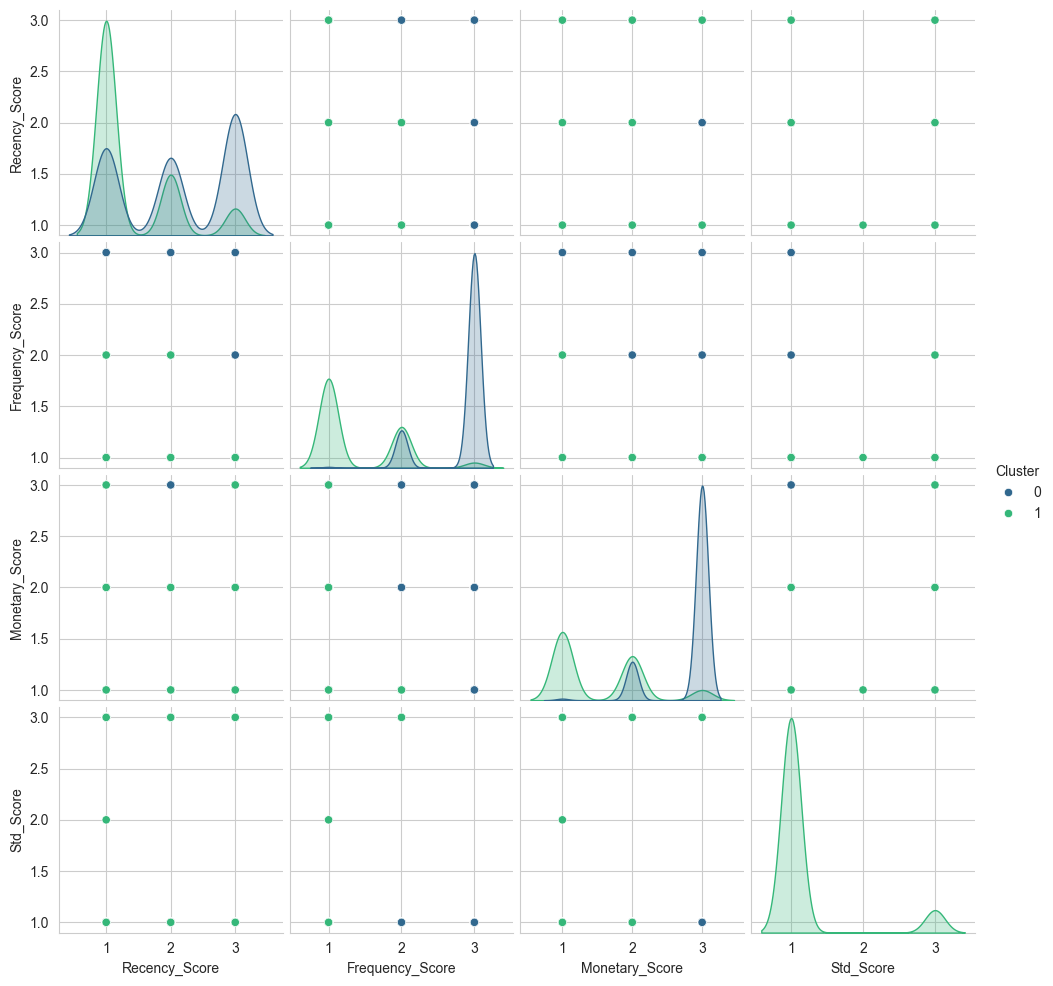

In [7]:
centers = visualize_rfms(rfms_df)

In [8]:
centers

array([[2.11953883, 2.84466019, 2.83677184, 1.        ],
       [1.3787327 , 1.37946103, 1.52585579, 1.19009468]])

## Classifiying Users based on Cluster Centers

##### Cluster Centers: Provides insight into the average RFMS scores for each cluster helps to define high and low risk.

In [10]:
segm_df = apply_segment_based_on_clusters(rfms_df, centers)

In [12]:
segm_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,RFM_Score,Segment
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,15,11,2018,3,3,3,1,3331,Low-risk
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,15,11,2018,1,1,1,3,1113,High-risk
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,3,15,11,2018,2,3,3,1,2331,Low-risk
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,...,3,15,11,2018,2,3,3,1,2331,Low-risk
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,...,4,15,11,2018,1,1,1,1,1111,High-risk


## Customer Segmentation

In [6]:
segmented_df = apply_customer_segmentation(rfms_df)
segmented_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,RFM_Score,Segment
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,15,11,2018,3,3,3,1,3331,Low-risk
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,15,11,2018,1,1,1,3,1113,High-risk
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,3,15,11,2018,2,3,3,1,2331,Low-risk
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,...,3,15,11,2018,2,3,3,1,2331,Low-risk
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,...,4,15,11,2018,1,1,1,1,1111,High-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,TransactionId_57056,BatchId_91682,AccountId_2083,SubscriptionId_2836,CustomerId_2488,UGX,256,ProviderId_1,ProductId_15,financial_services,...,18,12,2,2019,3,1,3,3,3133,Low-risk
94915,TransactionId_32019,BatchId_109450,AccountId_1902,SubscriptionId_2126,CustomerId_2296,UGX,256,ProviderId_1,ProductId_3,airtime,...,19,12,2,2019,3,1,1,3,3113,Low-risk
94966,TransactionId_60908,BatchId_68062,AccountId_2657,SubscriptionId_4361,CustomerId_3076,UGX,256,ProviderId_1,ProductId_15,financial_services,...,20,12,2,2019,3,1,1,1,3111,High-risk
94995,TransactionId_26627,BatchId_49104,AccountId_596,SubscriptionId_4336,CustomerId_934,UGX,256,ProviderId_1,ProductId_15,financial_services,...,21,12,2,2019,3,1,2,1,3121,High-risk


In [ ]:
rfms_df.describe()

In [ ]:
rfms_df.info()

In [ ]:
rfms_df.hist()

## Outliers detection in RFMS features

In [ ]:
outlier_indices = detect_rfms_outliers(rfms_df)

## MinMaxScaler Transformation of RFMS Feature

In [ ]:
scaled_df = scale_features(rfms_df)
scaled_df.describe()

In [ ]:
scaled_df.head()

In [ ]:
scaled_df.hist()

In [ ]:
outlier_indices = detect_rfms_outliers(scaled_df)

## Visualizing in RFMS Space

### Comparative Scoring

In [ ]:
bn_rfms_df =  assign_comparative_binary_score(scaled_df)
bn_rfms_df

### User classification

In [ ]:
classified_df = apply_classification(bn_rfms_df)
classified_df.head()

In [ ]:
classified_df.columns

In [ ]:
visualize_rfms(classified_df)

## Perform Weight of Evidence (WoE) binning 

In [ ]:
features = [
    'Recency', 'Frequency', 'Monetary', 'StdDev', 'OnTimePayments',
    '<Recency_avg', '>Frequency_avg', '>Monetary_avg', '>StdDev_avg',
    '>OnTimePayment_avg'
]


woe_df, woe_info, iv_info = woe_binning(classified_df, features, target='Classification')

print("WoE Info:")
print(woe_info)

print("\nIV Info:")
print(iv_info)

In [ ]:
woe_df

## Extract Time Features

In [ ]:
processed_data = extract_time_features(processed_data)
processed_data.head()
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

## Handle Missing Values

In [ ]:
processed_data = handle_missing_values(processed_data)
processed_data.info()

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
non_fraud_df = processed_data[processed_data['FraudResult'] == 1.0]
print(f"Number of fraudulent transactions: {len(non_fraud_df)}")

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Encode Categorical Variables

In [ ]:
processed_data = encode_categorical_variables(processed_data)
processed_data.info()

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Normalize/Standardize Numerical Features

In [ ]:
processed_data = normalize_and_standardize_numerical_features(processed_data)

In [ ]:
processed_data['FraudResult'].unique()

In [ ]:
processed_data.head()

In [ ]:
processed_data.info()

In [ ]:
processed_data

In [ ]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

In [ ]:
print(processed_data['FraudResult'].value_counts())

In [ ]:
processed_data['FraudResult'].unique()

## Save the the processed dataset

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)